In [1]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import *
import importlib
from common import *

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
X = flamingo

In [4]:
DWT_result, factors, strength = DWT_quant(X, log = True)

38500
bits: 149012, strength: 0.0
bits: 74005, strength: 1.0
bits: 40173, strength: 2.6180339999999998
bits: 43965, strength: 2.3149659759317407
bits: 20974, strength: 5.2360680251559995
bits: 40173, strength: 2.6180339999999998
bits: 30158, strength: 3.6180339844527363
bits: 48950, strength: 2.000000025156
bits: 37559, strength: 2.8595189463263457
bits: 37577, strength: 2.8572912536740267
bits: 38487, strength: 2.7714118887815986
bits: 39160, strength: 2.7128267501152465
bits: 38373, strength: 2.778982296444363
bits: 38665, strength: 2.756114316081817
bits: 38513, strength: 2.768308462821616
bits: 38501, strength: 2.7698601758016075
bits: 38501, strength: 2.769860134797677
bits: 38501, strength: 2.769860093793747
bits: 38505, strength: 2.769267423517846
bits: 38501, strength: 2.7696337138991423
bits: 38503, strength: 2.76949380342736
bits: 38501, strength: 2.7697201833219647
bits: 38501, strength: 2.7697736243652296
bits: 38501, strength: 2.7698066527469627
bits: 38501, strength: 2.76

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 38268
Bits for huffman table = 1424
38.268
Generating huffcode and ehuf using custom tables
Decoding rows
Error: 16.1


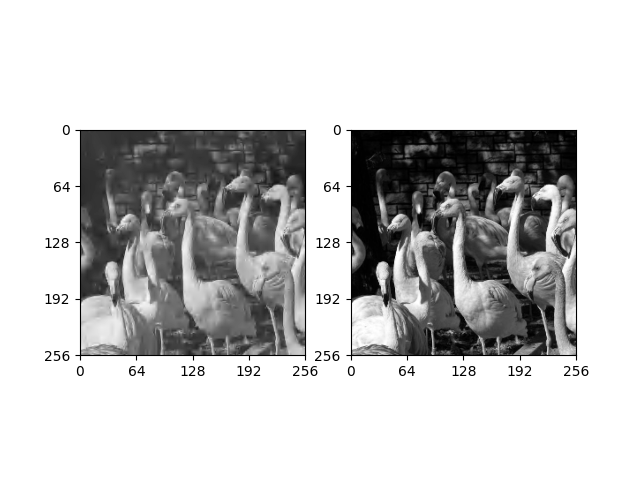

In [5]:
vlc, header = DWT_huffenc(DWT_result, dcbits=12, opthuff=True)
print(np.sum(vlc[:, 1])/1000)

DWT_decoded = DWT_huffdec(vlc, hufftab=header)


DWT_final = quantdwt2(DWT_decoded, factors, strength=strength)
reconstructed = inverse_DWT(DWT_final, N, g1, g2)


fig, axs = plt.subplots(1, 2)
plot_image(reconstructed, ax=axs[0])
plot_image(X, ax=axs[1])

# size_of_img = np.sum(vlc[:, 1])
# axs.set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')


print("Error:", np.std(reconstructed-X).round(2))

In [ ]:
vlc, header = DWT_huffenc(flamingo, N=7, dcbits=8, opthuff=True)
Z = DWT_huffdec(vlc, 10, factors, strength, N=7, hufftab=header)

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 528880
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


bananas
apple sauce
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 38391
Bits for huffman table = 1424
38391
Generating huffcode and ehuf using custom tables
Decoding rows


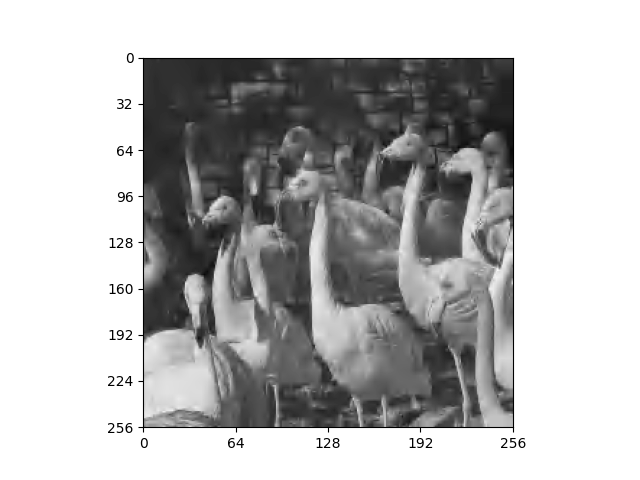

In [6]:
from competition.encoder import encode
from competition.decoder import decode

vlc, header = encode(flamingo)
print(np.sum(vlc[:, 1]))

decoded = decode(vlc, header)


fig, ax = plt.subplots()
plot_image(decoded, ax=ax)

In [5]:
step

7

In [16]:
Y = DWT(X, N)
ratios = get_ratios(Y, N, g1, g2)
factors = get_factors(Y, N)
factors = np.float16(factors)
dwtstep = np.ones((3, N+1))*ratios*10
Yq, _ = quantdwt(Y, dwtstep, factors, strength)
print(np.unique(Yq))

[-1.046e+03 -9.140e+02 -4.990e+02 -1.640e+02 -1.220e+02 -1.210e+02
 -1.070e+02 -1.060e+02 -1.040e+02 -9.600e+01 -7.400e+01 -7.200e+01
 -6.600e+01 -5.900e+01 -5.500e+01 -5.300e+01 -5.200e+01 -5.100e+01
 -4.900e+01 -4.800e+01 -4.700e+01 -4.600e+01 -4.400e+01 -4.300e+01
 -4.200e+01 -4.000e+01 -3.900e+01 -3.800e+01 -3.700e+01 -3.600e+01
 -3.500e+01 -3.400e+01 -3.300e+01 -3.200e+01 -3.100e+01 -3.000e+01
 -2.900e+01 -2.800e+01 -2.700e+01 -2.500e+01 -2.400e+01 -2.300e+01
 -2.200e+01 -2.100e+01 -2.000e+01 -1.900e+01 -1.800e+01 -1.700e+01
 -1.600e+01 -1.500e+01 -1.400e+01 -1.300e+01 -1.200e+01 -1.100e+01
 -1.000e+01 -9.000e+00 -8.000e+00 -7.000e+00 -6.000e+00 -5.000e+00
 -4.000e+00 -3.000e+00 -2.000e+00 -1.000e+00  0.000e+00  1.000e+00
  2.000e+00  3.000e+00  4.000e+00  5.000e+00  6.000e+00  7.000e+00
  8.000e+00  9.000e+00  1.000e+01  1.100e+01  1.200e+01  1.300e+01
  1.400e+01  1.500e+01  1.600e+01  1.700e+01  1.800e+01  1.900e+01
  2.000e+01  2.100e+01  2.200e+01  2.300e+01  2.400e+01  2.500